# DFT Benchmark
#### Task for Operational Calulus

In [0]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [0]:
def my_dft_v1(x):
  N  = len(x)
  X = np.zeros(N, dtype=complex)
  
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
  return X

In [0]:
def my_dft_v2(x):
  N = len(x)
  n = np.arange(N)
  X = np.zeros(N, dtype=complex)
  
  for k in range(N):
    X[k] = np.sum(x * np.exp(-2j * np.pi * k * n / N))
  return X

In [0]:
def my_dft_v3(x):
    '''DFT of the 1D array x. Using matrix-vector multiplication'''
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    w = np.exp(-2j * np.pi / N)
    W = np.power(w, n * k)
    return np.dot(W, x)

In [0]:
def my_dft(x):
    '''v4 DFT of the 1D array x. Using matrix-vector multiplication'''
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [101]:
a = np.array([10, 2, 34, 5])
np.allclose(my_dft(a), np.fft.fft(a))

True

50


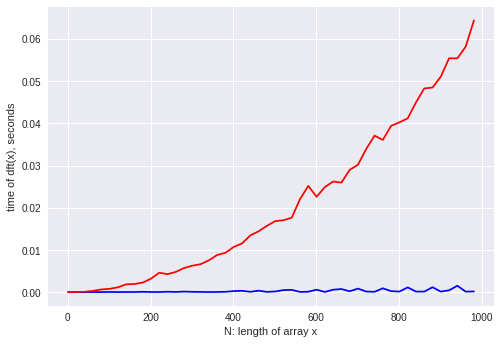

In [86]:
N = np.arange(1, 1000, 20)
lib = []
my  = []

for n in N:
  x = np.random.random(n)

  t0 = time()
  X = np.fft.fft(x)
  lib.append(time() - t0)
  
  t0 = time()
  X = my_dft(x)
  my.append(time() - t0)
  
#   if n % 20 == 0:
  print('\r', n, end='')
    
print(len(lib, ))

plt.plot(N, lib, 'b')
plt.plot(N, my, 'r')
plt.xlabel('N: length of array x')
plt.ylabel('time of dft(x), seconds')
plt.show()

 951

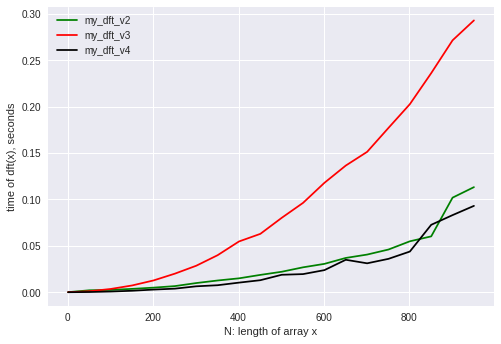

In [112]:
N = np.arange(1, 1000, 50)
my_v1 = []
my_v2 = []
my_v3 = []
my_v4 = []

for n in N:
  x = np.random.random(n)

#   t0 = time()
#   X = my_dft_v1(x)
#   my_v1.append(time() - t0)
  
  t0 = time()
  X = my_dft_v2(x)
  my_v2.append(time() - t0)
  
  t0 = time()
  X = my_dft_v3(x)
  my_v3.append(time() - t0)
  
  t0 = time()
  X = my_dft(x)
  my_v4.append(time() - t0)
  
  
  print('\r', n, end='')
    

# plt.plot(N, my_v1, 'b', label='my_dft_v1')
plt.plot(N, my_v2, 'g', label='my_dft_v2')
plt.plot(N, my_v3, 'r', label='my_dft_v3')
plt.plot(N, my_v4, 'k', label='my_dft_v4')


plt.xlabel('N: length of array x')
plt.ylabel('time of dft(x), seconds')
plt.legend()
plt.show()